### Import image dataset

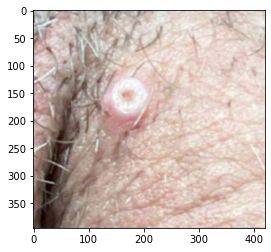

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2

CWD = os.getcwd()
CATEGORIES = ['Monkeypox', 'Melanoma', 'Acne', 'Normal', 'Combined']

for category in CATEGORIES: 
    DATA_DIR = CWD + '/dataset'
    path = os.path.join(DATA_DIR, category) # set path to the dataset directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))[:,:,::-1] # read images using openCV
        # display images using matplotlib
        plt.imshow(img_array)
        plt.show()
        break
    break

# 1). EDA

#### Number of images avaiable for each dataset category

Acne = 400 items

Melanoma = 600 items

Monkeypox. = 700 items

Normal skin = 700 items

Cyst,tumor and skin-tags = 600 items


# 2). Preparation & pre-processing of data

( In terms of Size, Dimention, Resolution of images and balance between data in each disease category )


### Set fixed dimention for all images

The size of all Acne images = 294 x 222 
The Resoultion of all Acne images = 96 x 96

while all other images are in different sizes. Therefore, convert the size of all images into 294 x 222

(Because, Resizing the images to the same size also makes it easier to train and evaluate the model, as it reduces the number of hyperparameters that need to be tuned. It can also reduce the amount of memory and computational resources required to train the model)


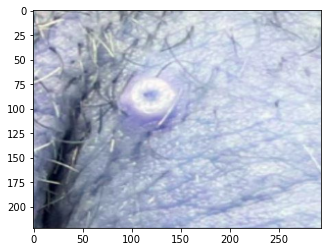

In [25]:
IMG_WIDTH = 294
IMG_HEIGHT = 222

new_img_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
plt.imshow(new_img_array)
plt.show()

### Set fixed resolution for all images

The color space of all images is in RGB format. Resolution of some images (including all Acne images) = 96x96. 

Should the resolution be changed or converted to a fixed size? 

### Data augmentation

To balance the weight of data in each disease category

### Create the training dataset

In [46]:
training_data = []

def creating_training_data():
    for category in CATEGORIES: 
        DATA_DIR = CWD + '/dataset'
        path = os.path.join(DATA_DIR, category) #path to dataset
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_img_arr = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
                training_data.append([new_img_arr, class_num])
            except Exception as e:
                pass
        
creating_training_data()    

In [47]:
print(len(training_data))

3000


In [53]:
import random

random.shuffle(training_data) # Shuffle data

# for sample in training_data[:10]:
#     print(sample[1])

# 3). Model building

# 4). Generating visual saliency map